In [62]:
import numpy as np
import random


## Himmelblau

In [63]:
# Función himmelblau
# si se pone onlyone a True

onlyone = False
def himmelblau (ch):
	x = ch[0]
	y = ch[1]
	fxy = (x**2 + y - 11)**2 + (x + y**2 -7)**2
	if onlyone and (x>0 or y>0): # himmelblau modified to have only one global minimum (-3.77, -3.28)
		fxy += 0.5
	return fxy

In [64]:
def seleccion_torneo(pop, fitnesses, T):
    """Selecciona el mejor de T candidatos aleatorios"""
    candidates_indices = np.random.choice(len(pop), T, replace=False)
    # Buscamos el índice del candidato con MAYOR fitness (porque estamos maximizando 1/(1+f))
    best_candidate_idx = candidates_indices[np.argmax([fitnesses[i] for i in candidates_indices])]
    return pop[best_candidate_idx]

def cruce_blx_alpha_logic(padre1, padre2, alpha=0.5):
    """Lógica matemática del cruce BLX-Alpha"""
    hijo = np.zeros(2)
    for i in range(2):
        c_min = min(padre1[i], padre2[i])
        c_max = max(padre1[i], padre2[i])
        diff = c_max - c_min

        lower = c_min - diff * alpha
        upper = c_max + diff * alpha

        gen = np.random.uniform(lower, upper)
        hijo[i] = np.clip(gen, rang[0], rang[1])
    return hijo

def mutacion_gaussiana_logic(ind, sigma=0.5):
    """Lógica matemática de la mutación gaussiana"""
    hijo = ind.copy()
    for i in range(len(hijo)):
        # Nota: La probabilidad se decide fuera, aquí aplicamos el ruido
        hijo[i] += np.random.normal(0, sigma)
        hijo[i] = np.clip(hijo[i], rang[0], rang[1])
    return hijo

In [65]:
# Define operadores de números reales

rang = (-5, 5) # al no hacerlo con clases, debemos definir el rango como variable global

def create(alphabet=None, N=100):
    """Crea la población inicial"""
    return [np.random.uniform(rang[0], rang[1], 2) for _ in range(N)]

def crossover(ind1, ind2, pcross):
    """
    Aplica cruce con probabilidad pcross.
    Usa la función auxiliar BLX-Alpha.
    """
    if random.random() < pcross:
        return cruce_blx_alpha_logic(ind1, ind2)
    else:
        return ind1.copy()

def mutate(ind, pmut):
    """
    Aplica mutación con probabilidad pmut (por individuo).
    Usa la función auxiliar Gaussiana.
    """
    if random.random() < pmut:
        return mutacion_gaussiana_logic(ind)
    return ind

In [66]:
# fitness para himmelblau: valor mínimo de la función

def fitness_himmel (ch):
	return 1 / (1 + himmelblau(ch))

In [67]:
def evolve(pop, fitness_fn, pmut, ngen, trace, T, pcross):
    pop_fitness = [fitness_fn(ind) for ind in pop]
    evaluaciones = len(pop)
    MAX_EVALS = 3500

    # Mejor inicial
    best_idx = np.argmax(pop_fitness)
    best_fit = pop_fitness[best_idx]
    best_ind = pop[best_idx].copy()

    # Creamos la lista para guardar la historia
    best_history = [best_fit]

    siguiente_reporte = 600

    for gen in range(ngen):
        next_pop = []
        next_pop.append(best_ind.copy()) # Elitismo

        while len(next_pop) < len(pop):
            # Selección Torneo
            candidates = np.random.choice(len(pop), T, replace=False)
            winner_idx = candidates[np.argmax([pop_fitness[i] for i in candidates])]
            parent1 = pop[winner_idx]

            candidates = np.random.choice(len(pop), T, replace=False)
            winner_idx = candidates[np.argmax([pop_fitness[i] for i in candidates])]
            parent2 = pop[winner_idx]

            # Operadores
            child = crossover(parent1, parent2, pcross)
            child = mutate(child, pmut)

            next_pop.append(child)
            evaluaciones += 1
            if evaluaciones >= MAX_EVALS: break

        pop = list(next_pop)
        pop_fitness = [fitness_fn(ind) for ind in pop]

        # Actualizar mejor
        curr_best_idx = np.argmax(pop_fitness)
        if pop_fitness[curr_best_idx] > best_fit:
            best_fit = pop_fitness[curr_best_idx]
            best_ind = pop[curr_best_idx].copy()

        # Guardamos el mejor de esta generación en la lista
        best_history.append(best_fit)

        if trace and evaluaciones >= siguiente_reporte:
            print(f"Evaluaciones: {evaluaciones}, Mejor fitness: {best_fit:.16f}")
            siguiente_reporte += 500

        if evaluaciones >= MAX_EVALS:
            if trace: print(f"Evaluaciones: {evaluaciones}, Mejor fitness: {best_fit:.16f}")
            break

    return best_ind, best_history

Iniciando 10 experimentos con reporte en vivo...

 Ejecución 1 
Evaluaciones: 638, Mejor fitness: 0.9999925983627136
Evaluaciones: 1128, Mejor fitness: 0.9999999968144517
Evaluaciones: 1618, Mejor fitness: 0.9999999999999891
Evaluaciones: 2108, Mejor fitness: 1.0000000000000000
Evaluaciones: 2647, Mejor fitness: 1.0000000000000000
Evaluaciones: 3137, Mejor fitness: 1.0000000000000000
Evaluaciones: 3500, Mejor fitness: 1.0000000000000000

 Ejecución 2 
Evaluaciones: 638, Mejor fitness: 0.9999403567443558
Evaluaciones: 1128, Mejor fitness: 0.9999999909252112
Evaluaciones: 1618, Mejor fitness: 0.9999999999999711
Evaluaciones: 2108, Mejor fitness: 0.9999999999999998
Evaluaciones: 2647, Mejor fitness: 1.0000000000000000
Evaluaciones: 3137, Mejor fitness: 1.0000000000000000
Evaluaciones: 3500, Mejor fitness: 1.0000000000000000

 Ejecución 3 
Evaluaciones: 638, Mejor fitness: 0.9999857721202710
Evaluaciones: 1128, Mejor fitness: 0.9999999667213630
Evaluaciones: 1618, Mejor fitness: 0.99999999

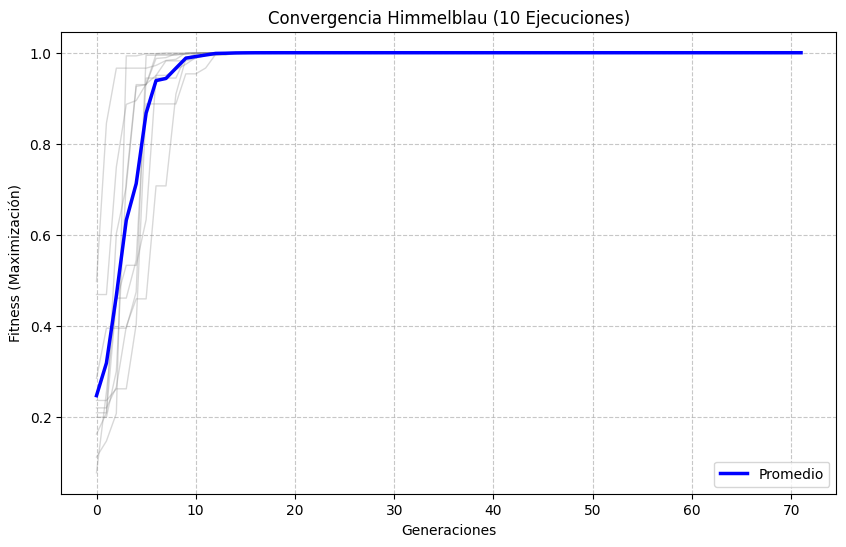

In [68]:
print("Iniciando 10 experimentos con reporte en vivo...\n")
all_histories = []

for i in range(10):
    print(f" Ejecución {i+1} ")
    pop_ini = create(N=50)

    best_sol, hist = evolve(pop_ini, fitness_himmel, pmut=0.2, ngen=1000, trace=True, T=3, pcross=0.9)

    all_histories.append(hist)
    print("") # Salto de línea entre ejecuciones

#  Generación del Gráfico
plt.figure(figsize=(10, 6))

# Líneas individuales (gris)
for h in all_histories:
    plt.plot(h, color='gray', alpha=0.3, linewidth=1)

# Línea promedio (azul)
min_len = min(len(h) for h in all_histories)
avg_history = np.mean([h[:min_len] for h in all_histories], axis=0)
plt.plot(avg_history, color='blue', linewidth=2.5, label='Promedio')

plt.title("Convergencia Himmelblau (10 Ejecuciones)")
plt.xlabel("Generaciones")
plt.ylabel("Fitness (Maximización)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [69]:
N_PARTICULAS = 50
ITERACIONES = 70 # 50*70 = 3500 evaluaciones (Mismo presupuesto que el GA)
DIMENSIONES = 2
LIMITES = (np.full(DIMENSIONES, -5.0), np.full(DIMENSIONES, 5.0))

# Función objetivo vectorizada para Pyswarms
def himmelblau_pyswarms(x):
    # x es una matriz de (n_particulas, 2)
    term1 = (x[:, 0]**2 + x[:, 1] - 11)**2
    term2 = (x[:, 0] + x[:, 1]**2 - 7)**2
    return term1 + term2

# Hiperparámetros estándar
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

In [70]:
pso_histories = []
pso_final_values = []

for i in range(10):
    # Inicializamos una nueva instancia cada vez para resetear posiciones aleatorias
    optimizer = ps.single.GlobalBestPSO(n_particles=N_PARTICULAS, dimensions=DIMENSIONES, options=options, bounds=LIMITES)

    # Ejecutamos (verbose=False para no llenar la pantalla)
    cost, pos = optimizer.optimize(himmelblau_pyswarms, iters=ITERACIONES, verbose=False)

    pso_histories.append(optimizer.cost_history)
    pso_final_values.append(cost)
    print(f"Ejecución PSO {i+1}: Coste final = {cost:.10f}")

Ejecución PSO 1: Coste final = 0.0000127230
Ejecución PSO 2: Coste final = 0.0000740777
Ejecución PSO 3: Coste final = 0.0002033511
Ejecución PSO 4: Coste final = 0.0000528292
Ejecución PSO 5: Coste final = 0.0003362063
Ejecución PSO 6: Coste final = 0.0000867679
Ejecución PSO 7: Coste final = 0.0004053132
Ejecución PSO 8: Coste final = 0.0000314924
Ejecución PSO 9: Coste final = 0.0002870148
Ejecución PSO 10: Coste final = 0.0167769165


In [71]:
media_pso = np.mean(pso_final_values)
std_pso = np.std(pso_final_values)
mejor_pso = np.min(pso_final_values)

print("\n ESTADÍSTICAS PSO (10 ejecuciones)")
print(f"Media Coste: {media_pso:.10f}")
print(f"Desviación Típica: {std_pso:.10f}")
print(f"Mejor Ejecución: {mejor_pso:.10f}")


 ESTADÍSTICAS PSO (10 ejecuciones)
Media Coste: 0.0018266692
Desviación Típica: 0.0049851352
Mejor Ejecución: 0.0000127230


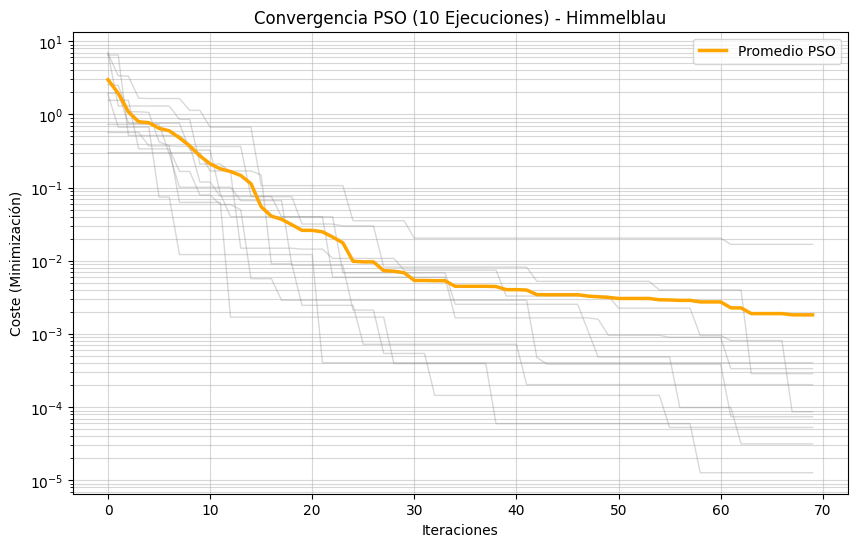

In [72]:
plt.figure(figsize=(10, 6))

# Líneas individuales (Dispersión)
for h in pso_histories:
    plt.plot(h, color='gray', alpha=0.3, linewidth=1)

# Línea Promedio
avg_history_pso = np.mean(pso_histories, axis=0)
plt.plot(avg_history_pso, color='orange', linewidth=2.5, label='Promedio PSO')

# Decoración
plt.title("Convergencia PSO (10 Ejecuciones) - Himmelblau")
plt.xlabel("Iteraciones")
plt.ylabel("Coste (Minimización)")
plt.yscale('log') # Escala logarítmica fundamental para ver el detalle cerca de 0
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.show()

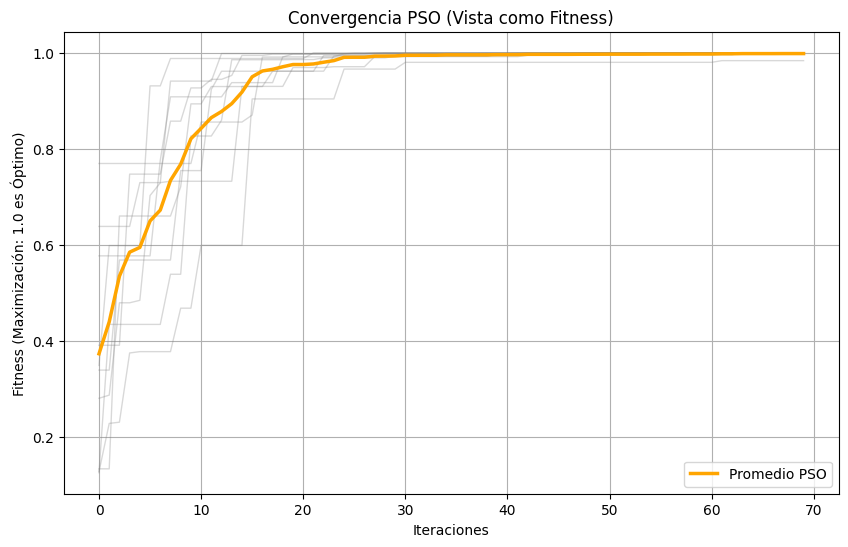

In [73]:
pso_fitness_histories = []
for h_coste in pso_histories:
    h_fitness = [1.0 / (1.0 + coste) for coste in h_coste]
    pso_fitness_histories.append(h_fitness)

#  GRÁFICA DE FITNESS DEL PSO
plt.figure(figsize=(10, 6))

# Líneas individuales
for h in pso_fitness_histories:
    plt.plot(h, color='gray', alpha=0.3, linewidth=1)

# Promedio
avg_fitness_pso = np.mean(pso_fitness_histories, axis=0)
plt.plot(avg_fitness_pso, color='orange', linewidth=2.5, label='Promedio PSO')

plt.title("Convergencia PSO (Vista como Fitness)")
plt.xlabel("Iteraciones")
plt.ylabel("Fitness (Maximización: 1.0 es Óptimo)")
plt.legend()
plt.grid(True)
plt.show()

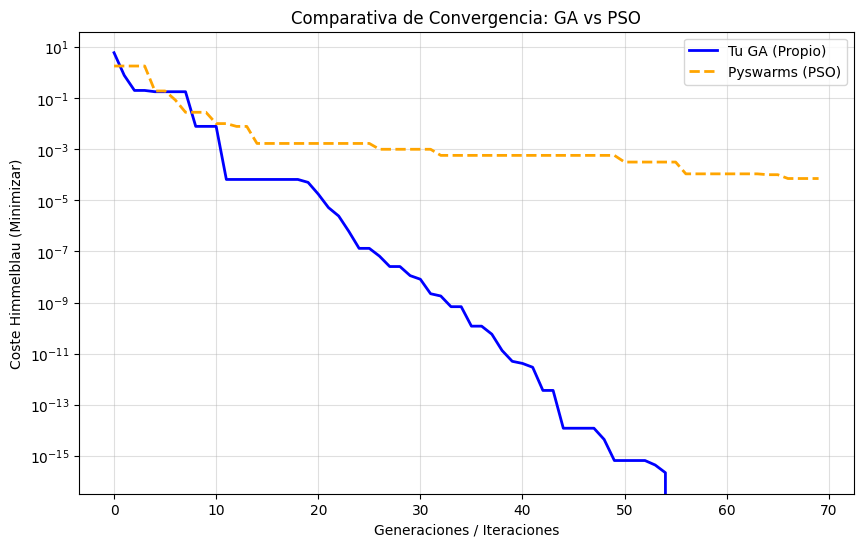

In [74]:
# GRÁFICA COMPARATIVA
plt.figure(figsize=(10, 6))

plt.plot(hist_coste_ga[:ITERACIONES], label='Tu GA (Propio)', color='blue', linewidth=2)

plt.plot(hist_coste_pso, label='Pyswarms (PSO)', color='orange', linestyle='--', linewidth=2)

plt.title("Comparativa de Convergencia: GA vs PSO")
plt.xlabel("Generaciones / Iteraciones")
plt.ylabel("Coste Himmelblau (Minimizar)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.4)

plt.yscale('log')

plt.show()